# Setting up section

In [ ]:
#Import the needed libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance, to_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Import the packages
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import tree
from sklearn.metrics import f1_score, average_precision_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
#Load the dataset and view information about the dataset
fraud_data = pd.read_csv("fraud.csv")
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Getting more information on the dataset
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#statistical summary of the dataset
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Data Cleaning**

***Drop Duplicates***

In [ ]:
fraud_data.shape

(6362620, 11)

In [ ]:
fraud_data = fraud_data.drop_duplicates()

In [ ]:
fraud_data.shape

(6362620, 11)

The shape of the dataset remainded the same after passing the drop_duplicates function. This shows that there are no duplicates in the dataset

***Check null values***

In [ ]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Before we begin our data analysis, we will check to confirm if there are any missing values from the dataset
fraud_data.isnull().values.any()

False

There are no NULL values in the dataset

#**Data Visualisation**

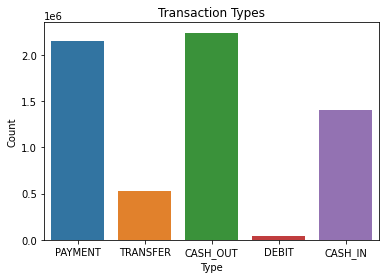

In [ ]:
# Plot a bar plot of the type of transactions
sns.countplot(x='type', data=fraud_data)
plt.title("Transaction Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

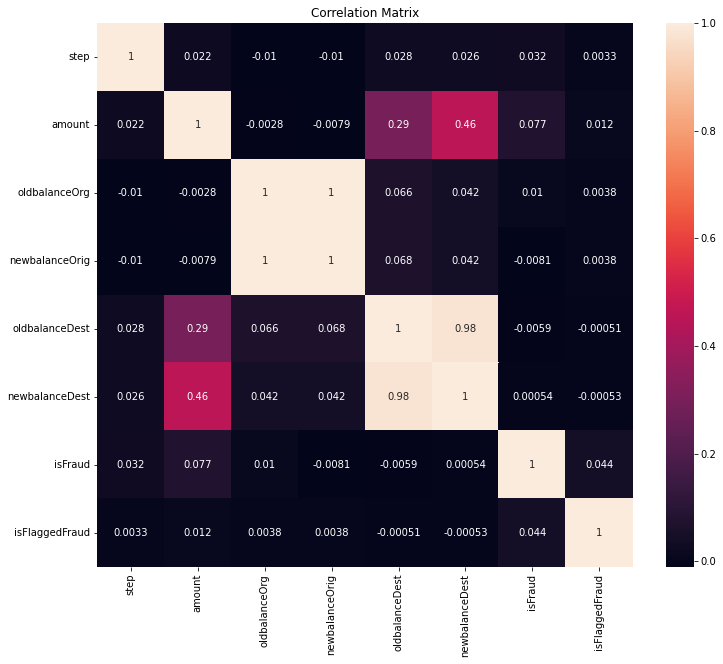

In [ ]:
# Plot a heatmap of the correlations between features
corr = fraud_data.corr()
plt.figure(figsize =(12,10))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

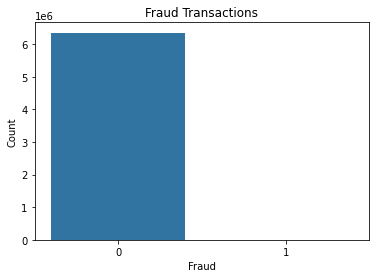

In [ ]:
# Plot a bar plot of the fraud transactions
sns.countplot(x='isFraud', data=fraud_data)
plt.title("Fraud Transactions")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()

In the outcome, 1 represents fraud while 0 represents not-fraud

The data visualization shows us that our plot is highly imbalanced.

# **Data Cleaning**


In [ ]:
#Next we confirm the number of fraudulent and non-fradulent transactions in the dataset
fraud_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**Check the transaction types that are tagged as fraud**

In [ ]:
print('\n The types of fraudulent transactions are {}'.format(\
list(fraud_data.loc[fraud_data.isFraud == 1].type.drop_duplicates().values)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


Since only TRANSFER and CASH_OUT transactions were tagged as fraud, we will use only the corresponding data

In [ ]:
# Preprocessing the data
# Specify the transaction types to be dropped
transaction_types_to_drop = ["CASH_IN", "DEBIT", "PAYMENT"]

# Filter the DataFrame to only include transactions that are not of the specified types
fraud_filter = fraud_data[~fraud_data["type"].isin(transaction_types_to_drop)].copy()


**Check the importance of the isFlaggedFraud Feature**

In [ ]:
#isFlaggedFraud feature
print('\nThe transaction  types in which isFlaggedFraud is set: \
{}'.format(list(fraud_data.loc[fraud_data.isFlaggedFraud == 1].type.drop_duplicates())))

print('\nThe number of transactions in which isFlaggedFraud festure is set: \
{}'.format(len(fraud_data.loc[fraud_data.isFlaggedFraud == 1])))


The transaction  types in which isFlaggedFraud is set: ['TRANSFER']

The number of transactions in which isFlaggedFraud festure is set: 16


The instances in which the isFlaggedFraud feature is set is very minimal when considered with the dataset, so we can consider the feature as unimportant and as such we can drop the feature

In [ ]:
# Drop unnecessary columns
fraud_filter.drop(['step','nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

# Replace the categorical variables for isFraud with numeric values
fraud_filter['type'] = fraud_filter['type'].replace({"CASH_OUT": 0, "TRANSFER": 1})

# Print the filtered DataFrame
print(fraud_filter.head())

    type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2      1     181.00          181.0             0.0             0.0   
3      0     181.00          181.0             0.0         21182.0   
15     0  229133.94        15325.0             0.0          5083.0   
19     1  215310.30          705.0             0.0         22425.0   
24     1  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  isFraud  
2             0.00        1  
3             0.00        1  
15        51513.44        0  
19            0.00        0  
24      2719172.89        0  


In [ ]:
fraud_filter.shape

(2770409, 7)

**Split the dataframe into features and labels**

In [ ]:
#Where X are the features and y is the target variable
X = fraud_filter.drop(columns=["isFraud"])
y = fraud_filter['isFraud']


In [ ]:
print(X.head())


    type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2      1     181.00          181.0             0.0             0.0   
3      0     181.00          181.0             0.0         21182.0   
15     0  229133.94        15325.0             0.0          5083.0   
19     1  215310.30          705.0             0.0         22425.0   
24     1  311685.89        10835.0             0.0          6267.0   

    newbalanceDest  
2             0.00  
3             0.00  
15        51513.44  
19            0.00  
24      2719172.89  


In [ ]:
print(y.head())

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64


In [ ]:
#Determine the imbalance ratio
Counter(y)

Counter({1: 8213, 0: 2762196})

**Transaction amount and account balance checks**

In [ ]:
# Plot a scatter plot of the oldbalanceDest and newbalanceDest
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', data=fraud_data)
plt.title("oldbalanceDest vs newbalanceDest")
plt.xlabel("oldbalanceDest")
plt.ylabel("newbalanceDest")
plt.show()

In [ ]:
# Check instances where transacted amount is 0
print('The number of transactions with transaction amount of zero is: ' +
str(sum(X['amount'] == 0)))

The number of transactions with transaction amount of zero is: 16


In [ ]:
X_isfraud = X.loc[y == 1]
X_noFraud = X.loc[y == 0]
print('\nThe fraction of fraudulent transactions where \'oldBalanceDest\' & \
\'newBalanceDest\' = 0 when transacted \'amount\' is not zero is: {}'.\
format(len(X_isfraud.loc[(X_isfraud.oldbalanceDest == 0) & \
(X_isfraud.newbalanceDest == 0) & (X_isfraud.amount)]) / (1.0 * len(X_isfraud))))

print('\nThe fraction of non-fraudulent transactions where \'oldBalanceDest\' & \
newBalanceDest\' = 0 when transacted \'amount\' is not zero is: {}'.\
format(len(X_noFraud.loc[(X_noFraud.oldbalanceDest == 0) & \
(X_noFraud.newbalanceDest == 0) & (X_noFraud.amount)]) / (1.0 * len(X_noFraud))))


The fraction of fraudulent transactions where 'oldBalanceDest' & 'newBalanceDest' = 0 when transacted 'amount' is not zero is: 0.4955558261293072

The fraction of non-fraudulent transactions where 'oldBalanceDest' & newBalanceDest' = 0 when transacted 'amount' is not zero is: 0.0006176245277308345


The account balance being zero is a strong indicator of fraud, so imputing the balance with a statistic or distribution would mask this indicator. Instead, the value of 0 is replaced with -1, which is more useful for an ML algorithm detecting fraud.

In [ ]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

The data includes transactions where the originating account's balance was zero before or after a transaction involving a non-zero amount. When compared to genuine transactions, the percentage of fraudulent transactions is substantially lower. The value of 0 is changed to a null value rather than being imputed with a numerical value.

#**Feature engineering**

In [ ]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [ ]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,1,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,0,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,0,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


In [ ]:
y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

# **Model Selection**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
norm_X = scaler.transform(X)

In [ ]:
norm_X

array([[1.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        5.94973445e-05, 0.00000000e+00],
       [0.00000000e+00, 2.47858358e-03, 2.57195429e-04, 0.00000000e+00,
        1.42774526e-05, 1.44627841e-04],
       ...,
       [0.00000000e+00, 6.82716643e-02, 1.05922716e-01, 0.00000000e+00,
        1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        1.82859791e-02, 2.06640365e-02]])

# Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
method = RandomUnderSampler(random_state = 42)

In [ ]:
X_resampled, y_resampled = method.fit_resample(norm_X, y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)

(13140, 6) (13140,)


In [ ]:
print(X_test.shape,y_test.shape)

(3286, 6) (3286,)


In [ ]:
Counter(y_train)

Counter({0: 6564, 1: 6576})

In [ ]:
print('Original dataset:', Counter(y))
print('Resampled dataset:', Counter(y_resampled))

Original dataset: Counter({0: 2762196, 1: 8213})
Resampled dataset: Counter({0: 8213, 1: 8213})


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Fit a logistic regression model to our data
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Obtain model predictions
Log_predicted = log_model.predict(X_test)

In [ ]:
# Print the classification report and confusion matrix
print('Logistic Regression Classification report:\n', classification_report(y_test, Log_predicted))
logconf_mat = confusion_matrix(y_true=y_test, y_pred=Log_predicted)
print('Logistic Regression Confusion matrix:\n', logconf_mat)

Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      1649
           1       0.75      0.60      0.67      1637

    accuracy                           0.70      3286
   macro avg       0.71      0.70      0.70      3286
weighted avg       0.71      0.70      0.70      3286

Logistic Regression Confusion matrix:
 [[1323  326]
 [ 653  984]]


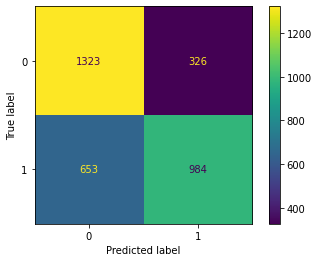

In [ ]:
logconf_mat = confusion_matrix(y_test, Log_predicted, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=logconf_mat, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [ ]:
# Obtain model probabilities
probs = log_model.predict_proba(X_test)
# Print ROC_AUC score using probabilities
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.8528746805323972


#**Decision Tree**

In [ ]:
# Define the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Define the range of max_depth values to try
params = {'max_depth': [2, 4, 6, 8, 10]}

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(decision_tree, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of max_depth
print('Best max_depth:', grid_search.best_params_['max_depth'])

Best max_depth: 8


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=8)
decision_tree.fit(X_train, y_train)
print("Accuracy:", decision_tree.score(X_test, y_test))

Accuracy: 0.9847839318320146


In [ ]:
# Predict the labels of the test set
dectree_pred = decision_tree.predict(X_test)

In [ ]:
# Generate a classification report
print('Decision Tree Classification report:\n',classification_report(y_test, dectree_pred))
decconf_mat = confusion_matrix(y_true=y_test, y_pred=dectree_pred)
print('Decision Tree Confusion matrix:\n', decconf_mat)

Decision Tree Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1649
           1       0.98      0.99      0.98      1637

    accuracy                           0.98      3286
   macro avg       0.98      0.98      0.98      3286
weighted avg       0.98      0.98      0.98      3286

Decision Tree Confusion matrix:
 [[1611   38]
 [  12 1625]]


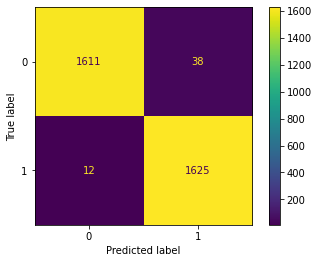

In [ ]:
decconf_mat = confusion_matrix(y_test, dectree_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=decconf_mat, display_labels=decision_tree.classes_)
disp.plot()
plt.show()

#**SVM**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='rbf', C=1, gamma=0.001, random_state=42)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.001, random_state=42)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
# Generate a classification report
print('SVC Classification report:\n',classification_report(y_test, svc_pred))
svcconf_mat = confusion_matrix(y_true=y_test, y_pred=svc_pred)
print('SVC Confusion matrix:\n', svcconf_mat)

SVC Classification report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69      1649
           1       0.70      0.48      0.57      1637

    accuracy                           0.64      3286
   macro avg       0.66      0.64      0.63      3286
weighted avg       0.66      0.64      0.63      3286

SVC Confusion matrix:
 [[1322  327]
 [ 856  781]]


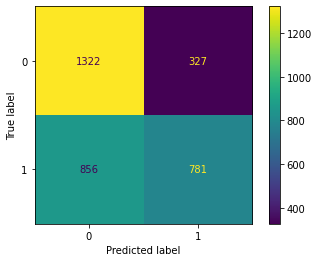

In [ ]:
svcconf_mat = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=svcconf_mat, display_labels=svc.classes_)
disp.plot()
plt.show()

#**K-Nearest**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the k-NN classifier
k_neighbors_classifier = KNeighborsClassifier()

# Define the range of n_neighbors values to try
params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(k_neighbors_classifier, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best value of n_neighbors
print('Best n_neighbors:', grid_search.best_params_['n_neighbors'])

Best n_neighbors: 1


In [ ]:
k_neighbors_classifier = KNeighborsClassifier(n_neighbors=1, weights='distance', p=2)

In [ ]:
k_neighbors_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [ ]:
predictions_knn = k_neighbors_classifier.predict(X_test)

In [ ]:
print('k-NN score: ', k_neighbors_classifier.score(X_test, y_test))
confusion_matrix_knn = confusion_matrix(y_test, list(predictions_knn))
print('KNearest Classification report:\n', classification_report(y_test, predictions_knn))
print('confusion matrix\n', confusion_matrix_knn)

k-NN score:  0.9701765063907486
KNearest Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1649
           1       0.96      0.98      0.97      1637

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286

confusion matrix
 [[1590   59]
 [  39 1598]]


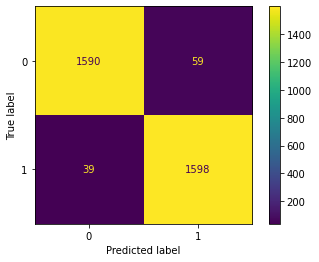

In [ ]:
confusion_matrix_knn = confusion_matrix(y_test, predictions_knn, labels=k_neighbors_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=k_neighbors_classifier.classes_)
disp.plot()
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Define the Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform 5-fold cross-validation and get the accuracy scores
scores = cross_val_score(naive_bayes, norm_X, y, cv=5)

# Print the mean and standard deviation of the accuracy scores
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


In [ ]:
naive_bayes = GaussianNB()

In [ ]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB_pred = naive_bayes.predict(X_test)

In [ ]:
print('Naive Bayes score: ', naive_bayes.score(X_test, y_test))
NB_confusion_matrix = confusion_matrix(y_test, list(NB_pred))
print('Naive Bayes Classification report:\n', classification_report(y_test, NB_pred))
print('confusion matrix\n', NB_confusion_matrix)

Naive Bayes score:  0.7343274497869751
Naive Bayes Classification report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79      1649
           1       0.95      0.49      0.65      1637

    accuracy                           0.73      3286
   macro avg       0.81      0.73      0.72      3286
weighted avg       0.81      0.73      0.72      3286

confusion matrix
 [[1610   39]
 [ 834  803]]


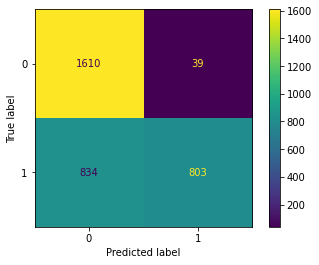

In [ ]:
NB_confusion_matrix = confusion_matrix(y_test, NB_pred, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=NB_confusion_matrix, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

# Comparing fitting of the models with under sampling

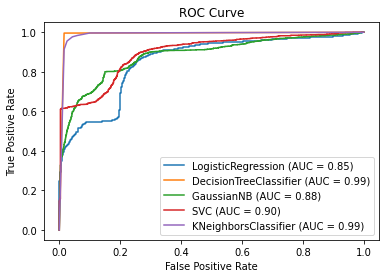

In [ ]:
# Define the models to be compared
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB(), SVC(probability=True), KNeighborsClassifier()]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=model.__class__.__name__ + ' (AUC = %0.2f)' % auc)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Show plot
plt.show()

# Evaluate Models Performance

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('KN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# Train and evaluate models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'F1 Score': f1})

# Create DataFrame of results
ranking = pd.DataFrame(results)
ranking = ranking.sort_values(by='F1 Score', ascending=False)

print(ranking)

  Model  F1 Score
1    DT  0.989973
3    KN  0.967040
4   SVM  0.750580
0    LR  0.667798
2   GNB  0.647842


In [ ]:
ranking

,Model,F1 Score
1,DT,0.989973
3,KN,0.967040
4,SVM,0.750580
0,LR,0.667798
2,GNB,0.647842
